# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [1]:
#Data processing and wrangling libraries
import pandas as pd
import numpy as np
#Data Visualization libraries
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns
#To ignore warnings 
import warnings
warnings.filterwarnings("ignore") #ignore warning

---
## 2. Load data

In [2]:
df = pd.read_csv('./processed_data.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

Unnamed: 0                                id  \
0           0  24011ae4ebbe3035111d65fa7c15bc57   
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month  \
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0   
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  forecast_cons_12m  \
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23               0.00   
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31             189.95   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17              47.96   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31             240.04   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  avg_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_mid_peak_var  \
0                 0.100749                     0.066530   
1                 0.007124                     0.000000   
2                 0.088421                     0.000000   
3                 0.000000                     0.000000   
4                 0.103638                     0.072865   

   avg_year_price_off_peak_fix  avg_year_price_peak_fix  \
0                    40.942265                22.352010   
1                    44.311375                 0.000000   
2                    44.385450                 0.000000   
3 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 56 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      14605 non-null  int64  
 1   id                              14605 non-null  object 
 2   channel_sales                   14605 non-null  object 
 3   cons_12m                        14605 non-null  int64  
 4   cons_gas_12m                    14605 non-null  int64  
 5   cons_last_month                 14605 non-null  int64  
 6   date_activ                      14605 non-null  object 
 7   date_end                        14605 non-null  object 
 8   date_modif_prod                 14605 non-null  object 
 9   date_renewal                    14605 non-null  object 
 10  forecast_cons_12m               14605 non-null  float64
 11  forecast_cons_year              14605 non-null  int64  
 12  forecast_discount_energy        

In [5]:
#Converting the object datatype to datetime of relevant columns
df["date_activ"] = pd.to_datetime(df["date_activ"])
df["date_end"] = pd.to_datetime(df["date_end"])
df["date_modif_prod"] = pd.to_datetime(df["date_modif_prod"])
df["date_renewal"] = pd.to_datetime(df["date_renewal"])

In [6]:
#Dropping unessecary columns(here 'Unnamed: 0')
df.drop(columns='Unnamed: 0',inplace=True)

In [7]:
df.shape

(14605, 55)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14605 entries, 0 to 14604
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              14605 non-null  object        
 1   channel_sales                   14605 non-null  object        
 2   cons_12m                        14605 non-null  int64         
 3   cons_gas_12m                    14605 non-null  int64         
 4   cons_last_month                 14605 non-null  int64         
 5   date_activ                      14605 non-null  datetime64[ns]
 6   date_end                        14605 non-null  datetime64[ns]
 7   date_modif_prod                 14605 non-null  datetime64[ns]
 8   date_renewal                    14605 non-null  datetime64[ns]
 9   forecast_cons_12m               14605 non-null  float64       
 10  forecast_cons_year              14605 non-null  int64         
 11  fo

The dataset contains information on PowerCo's customer churn, indicating whether a customer will switch or not. "Churn" column acts as a label (0 means the customer didn't switched and 1 means they did). This "Churn" label is what we will be training our model to predict, using the other columns as features to facilitate this prediction.
Random Forest classifier will used to predict customer churn and evaluate the performance of the model with suitable evaluation metrics.

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [9]:
price_df = pd.read_csv('price_data.csv')
price_df["price_date"] = pd.to_datetime(price_df["price_date"])
price_df.head()

id price_date  price_off_peak_var  \
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367   
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix  \
0             0.0                 0.0           44.266931             0.0   
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [10]:
# Group off-peak prices by companies and month
monthly_price_by_id = price_df.groupby(['id', 'price_date']).agg({'price_off_peak_var': 'mean', 'price_off_peak_fix': 'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

# Calculate the difference
diff = pd.merge(dec_prices.rename(columns={'price_off_peak_var': 'dec_1', 'price_off_peak_fix': 'dec_2'}), jan_prices.drop(columns='price_date'), on='id')
diff['offpeak_diff_dec_january_energy'] = diff['dec_1'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_january_power'] = diff['dec_2'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_january_energy','offpeak_diff_dec_january_power']]
diff.head()

id  offpeak_diff_dec_january_energy  \
0  0002203ffbb812588b632b9e628cc38d                        -0.006192   
1  0004351ebdd665e6ee664792efc4fd13                        -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                         0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                        -0.010018   
4  00114d74e963e47177db89bc70108537                        -0.003994   

   offpeak_diff_dec_january_power  
0                        0.162916  
1                        0.177779  
2                        1.500000  
3                        0.162916  
4                       -0.000001

First 5 entries of the dataframes created

In [11]:
monthly_price_by_id.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_off_peak_fix  
0           40.565969  
1           40.565969  
2           40.728885  
3           40.728885  
4           40.728885

In [12]:
jan_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098   
1  0004351ebdd665e6ee664792efc4fd13 2015-01-01            0.148047   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-01-01            0.150837   
3  0010ee3855fdea87602a5b7aba8e42de 2015-01-01            0.123086   
4  00114d74e963e47177db89bc70108537 2015-01-01            0.149434   

   price_off_peak_fix  
0           40.565969  
1           44.266931  
2           44.444710  
3           40.565969  
4           44.266931

In [13]:
dec_prices.head()

id price_date  price_off_peak_var  \
0  0002203ffbb812588b632b9e628cc38d 2015-12-01            0.119906   
1  0004351ebdd665e6ee664792efc4fd13 2015-12-01            0.143943   
2  0010bcc39e42b3c2131ed2ce55246e3c 2015-12-01            0.201280   
3  0010ee3855fdea87602a5b7aba8e42de 2015-12-01            0.113068   
4  00114d74e963e47177db89bc70108537 2015-12-01            0.145440   

   price_off_peak_fix  
0           40.728885  
1           44.444710  
2           45.944710  
3           40.728885  
4           44.266930

In [14]:
#Adding diff data to the processed dataframe
df = pd.merge(df, diff, on='id')

In [15]:
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end  \
0         0         54946                0 2013-06-15 2016-06-15   
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  forecast_cons_year  \
0      2015-11-01   2015-06-23               0.00                   0   
1      2009-08-21   2015-08-31             189.95                   0   
2      2010-04-16   2015-04-17              47.96                   0   
3      2010-03-30   2015-03-31             240.04                   0   
4      2010-01-13   2015-03-09             445.75                 526   

   forecast_discount_energy  forecast_meter_rent_12m  \
0                       0.0                     1.78   
1                       0.0                    16.27   
2                       0.0                    38.72   
3                       0.0                    19.83   
4                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  avg_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_mid_peak_var  \
0                 0.100749                     0.066530   
1                 0.007124                     0.000000   
2                 0.088421                     0.000000   
3                 0.000000                     0.000000   
4                 0.103638                     0.072865   

   avg_year_price_off_peak_fix  avg_year_price_peak_fix  \
0                    40.942265                22.352010   
1                    44.311375                 0.000000   
2                    44.385450                 0.000000   
3                    44.400265                 0.000000   
4                    40.688156                24.412893  

New features tenure, active months, months of contract left, months since last modification and months since last renewal can be created by the date_activ, date_end, date_modif_prod and date_renewal datetime data.

In [16]:
df = df.drop(columns=['date_activ', 'date_end', 'date_modif_prod', 'date_renewal'])
df.head()

id                     channel_sales  \
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua   
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0         0         54946                0               0.00   
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0                   0                       0.0                     1.78   
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.114481                    0.098142   
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak has_gas  imp_cons  margin_gross_pow_ele  \
0                    40.606701       t      0.00                 25.44   
1                    44.311378       f      0.00                 16.38   
2                    44.311378       f      0.00                 28.60   
3                    44.311378       f      0.00                 30.22   
4                    40.606701       f     52.32                 44.91   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  \
0               25.44            2      678.99                3   
1               16.38            1       18.89                6   
2               28.60            1        6.60                6   
3               30.22            1       25.46                6   
4               44.91            1       47.98                6   

                          origin_up  pow_max  avg_year_price_off_peak_var  \
0  lxidpiddsbxsbosboudacockeimpuepw   43.648                     0.124787   
1  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.800                     0.149609   
2  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.856                     0.170512   
3  kamkkxfxxuwbdslkwifmmcsiusiuosws   13.200                     0.151210   
4  kamkkxfxxuwbdslkwifmmcsiusiuosws   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_mid_peak_var  \
0                 0.100749                     0.066530   
1                 0.007124                     0.000000   
2                 0.088421                     0.000000   
3                 0.000000                     0.000000   
4                 0.103638                     0.072865   

   avg_year_price_off_peak_fix  avg_year_price_peak_fix  \
0                    40.942265                22.352010   
1                    44.311375                 0.000000   
2                    44.385450                 0.000000   
3                    44.400265                 0.000000   
4                    40.688156                24.412893   

   avg_year_price_mid_peak_fix  avg_year_price_off_peak  avg_year_price_peak  \
0                    14.901340                41.067053            22.452760   
1                     0.000000                44.460984             0.007124   
2                     0.000000                44.555962             0.088421   
3             

In [17]:
#Encoding 'has_gas' column values (t=1 and f=0)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['has_gas'] = le.fit_transform(df['has_gas'])

In [18]:
df['channel_sales'].value_counts()

channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6753
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

In [19]:
df['origin_up'].value_counts()

origin_up
lxidpiddsbxsbosboudacockeimpuepw    7096
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

In [20]:
#Encoding the channel_sales and origin_up features
df = pd.get_dummies(df, columns = ['channel_sales', 'origin_up'], dtype=int)

In [21]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0   
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0               0.00                   0                       0.0   
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                     1.78                        0.114481   
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.098142                    40.606701        1      0.00   
1                    0.000000                    44.311378        0      0.00   
2                    0.087899                    44.311378        0      0.00   
3                    0.000000                    44.311378        0      0.00   
4                    0.100015                    40.606701        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  avg_year_price_off_peak_var  \
0                3   43.648                     0.124787   
1                6   13.800                     0.149609   
2                6   13.856                     0.170512   
3                6   13.200                     0.151210   
4                6   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_mid_peak_var  \
0                 0.100749                     0.066530   
1                 0.007124                     0.000000   
2                 0.088421                     0.000000   
3                 0.000000                     0.000000   
4                 0.103638                     0.072865   

   avg_year_price_off_peak_fix  avg_year_price_peak_fix  \
0                    40.942265                22.352010   
1                    44.311375                 0.000000   
2                    44.385450                 0.000000   
3                    44.400265                 0.000000   
4                    40.688156                24.412893   

   avg_year_price_mid_peak_fix  avg_year_price_off_peak  avg_year_price_peak  \
0                    14.901340                41.067053            22.452760   
1                     0.000000                44.460984             0.007124   
2                     0.000000                44.555962             0.088421   
3                     0.000000                44.551475             0.000000   
4                    16.275263                40.812330            24.516531   

   avg_year_price_med_peak price_date_y  avg_3m_price_off_peak_var  \
0                14.967871   2015-11-16                   0.131756   
1                 0.000000   2015-11-16                   0.147600   
2                 0.000000   2015-11-16                   0.167798   
3     

Now we have many new columns/features and we can drop the insignificant ones with less frequent occurences

In [22]:
df = df.drop(columns=['channel_sales_sddiedcslfslkckwlfkdpoeeailfpeds', 'channel_sales_epumfxlbckeskwekxbiuasklxalciiuu','channel_sales_fixdbufsefwooaasfcxdxadsiekoceaa','origin_up_MISSING', 'origin_up_usapbepcfoloekilkwsdiboslwaxobdp', 'origin_up_ewxeelcelemmiwuafmddpobolfuxioce'])

In [23]:
df.shape

(14605, 59)

In [24]:
df[['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']].describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
count  1.460500e+04  1.460500e+04     14605.000000       14605.000000   
mean   1.592303e+05  2.809108e+04     16091.371448        1868.638618   
std    5.734836e+05  1.629786e+05     64366.262314        2387.651549   
min    0.000000e+00  0.000000e+00         0.000000           0.000000   
25%    5.674000e+03  0.000000e+00         0.000000         494.980000   
50%    1.411600e+04  0.000000e+00       793.000000        1112.610000   
75%    4.076400e+04  0.000000e+00      3383.000000        2402.270000   
max    6.207104e+06  4.154590e+06    771203.000000       82902.830000   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
count        14605.000000              14605.000000             14605.000000   
mean          1399.858747                  0.966450                63.090448   
std           3247.876793                  5.108355                66.166636   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                16.180000   
50%            314.000000                  0.000000                18.800000   
75%           1746.000000                  0.000000               131.030000   
max         175375.000000                 30.000000               599.310000   

       forecast_price_energy_off_peak  forecast_price_energy_peak  \
count                    14605.000000                14605.000000   
mean                         0.137282                    0.050488   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  
count                 14605.000000  
mean                     43.130085  
std                       4.486140  
min                       0.000000  
25%                      40.606701  
50%                      44.311378  
75%                      44.311378  
max                      59.266378

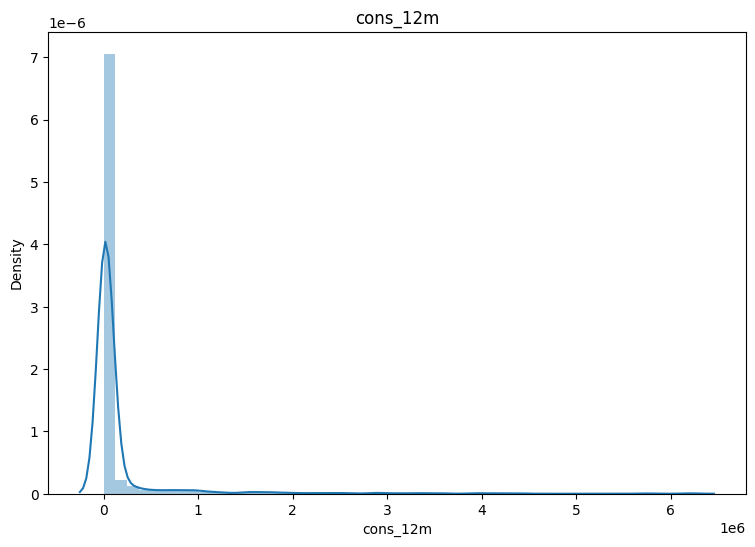

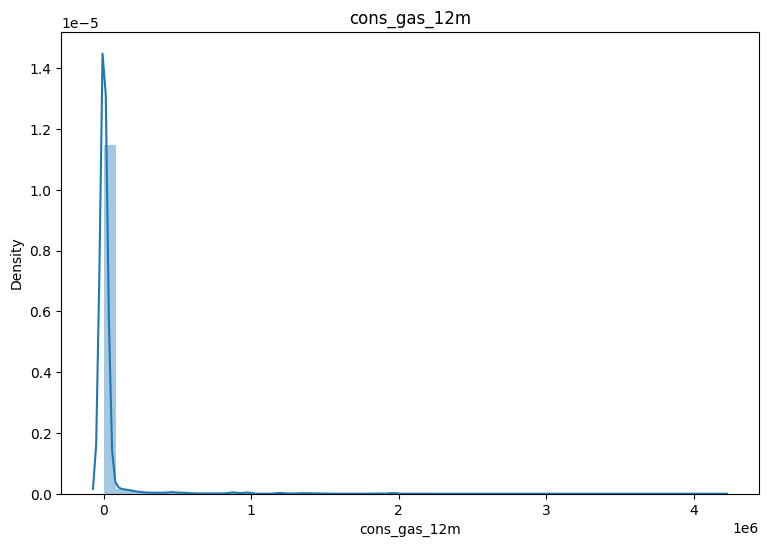

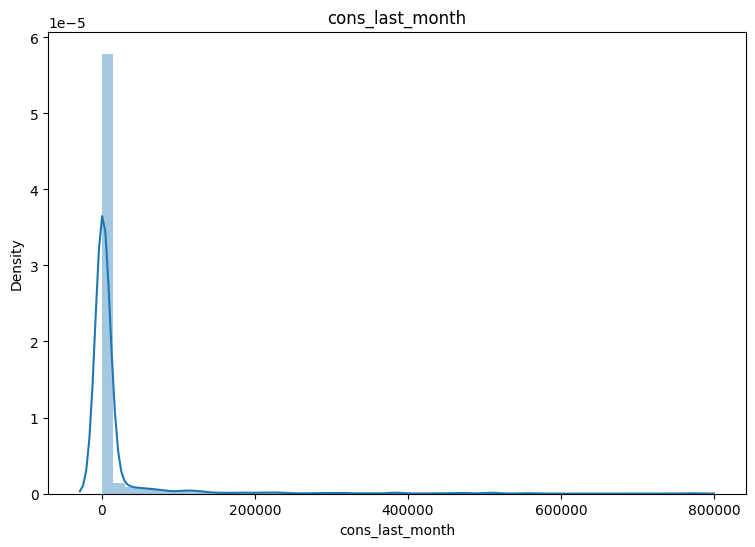

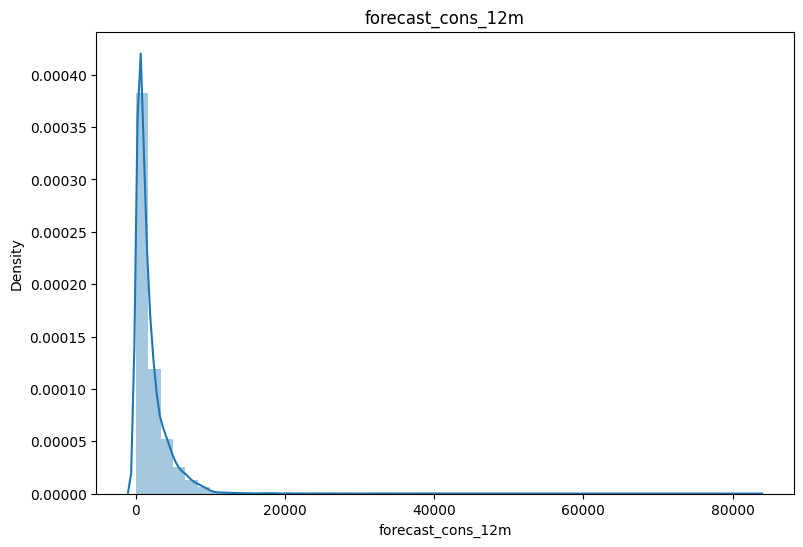

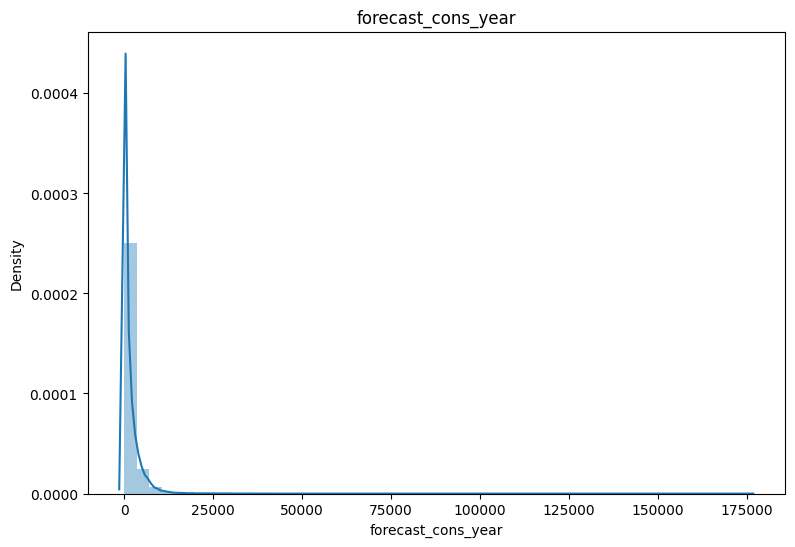

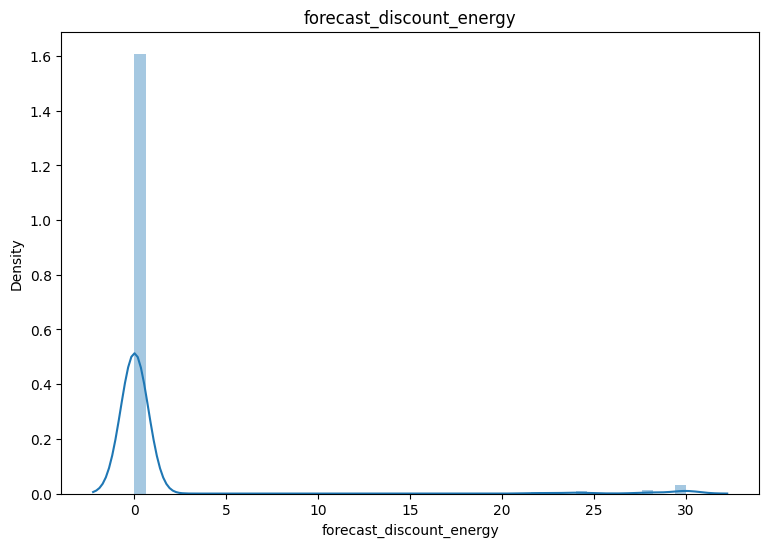

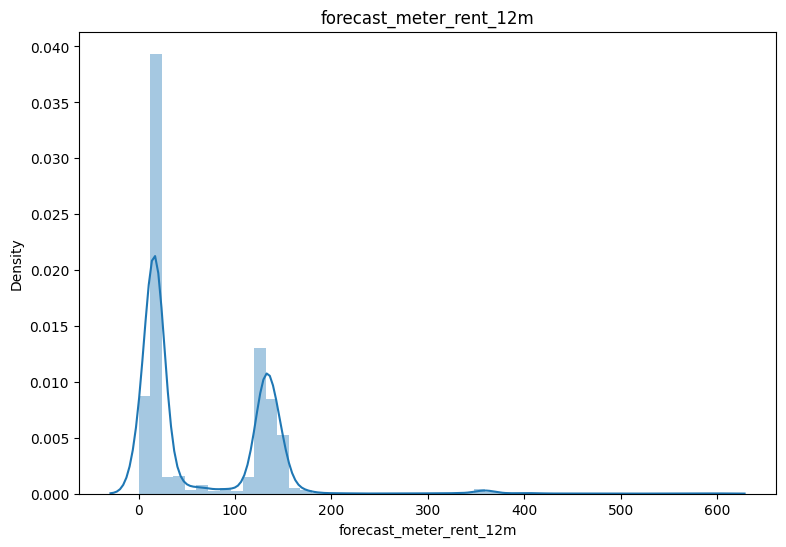

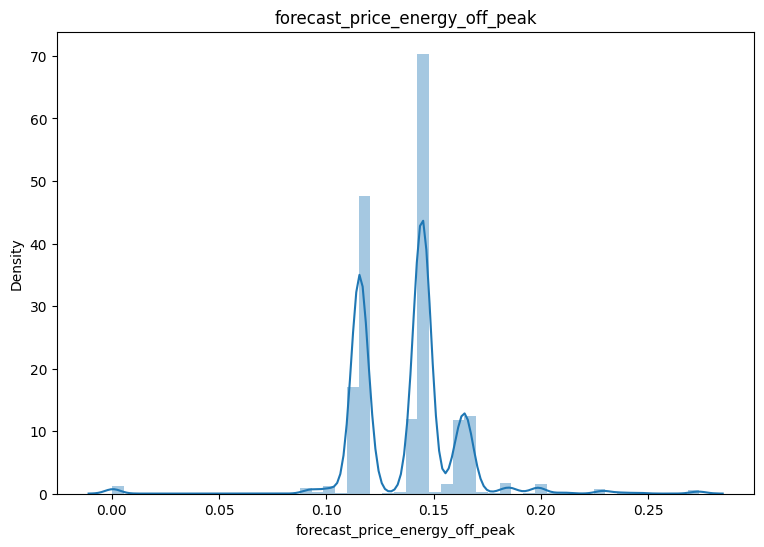

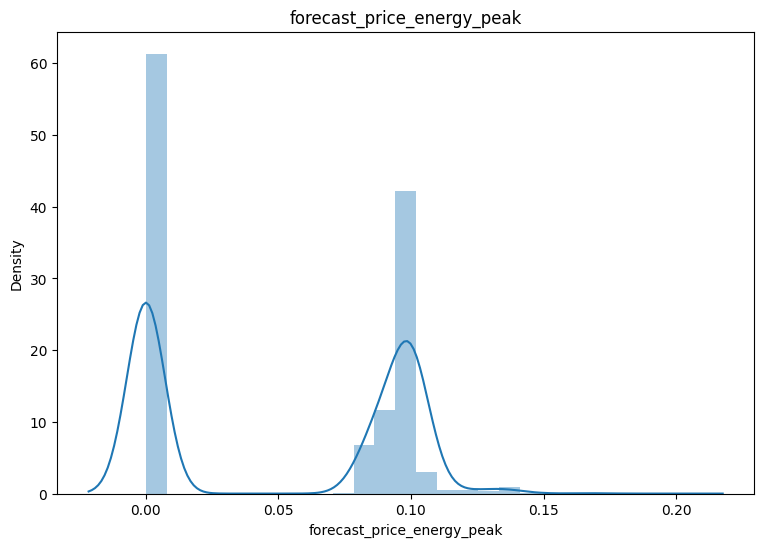

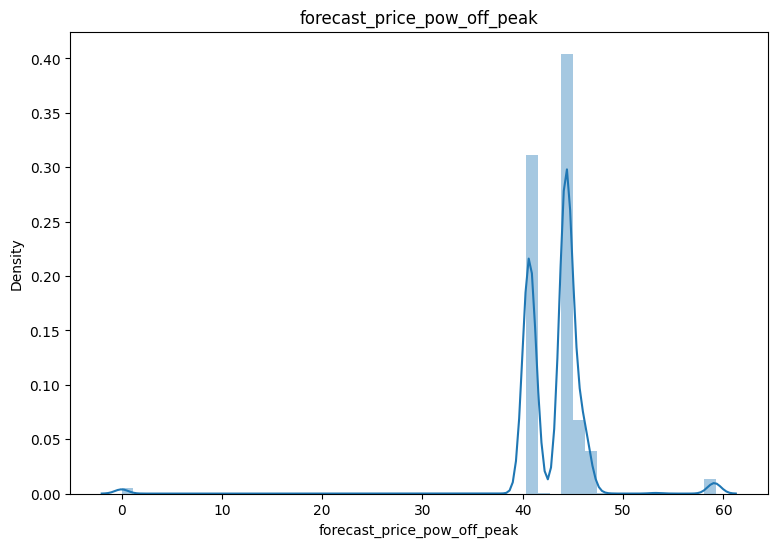

In [25]:
#Plotting the numeric columns
num_cols=df[['cons_12m', 'cons_gas_12m', 'cons_last_month','forecast_cons_12m', 'forecast_cons_year', 'forecast_discount_energy','forecast_meter_rent_12m', 'forecast_price_energy_off_peak','forecast_price_energy_peak', 'forecast_price_pow_off_peak']]
for i in num_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    sns.distplot(feature, ax = ax)
    ax.set_title(i)
plt.show()

In [26]:
#To reduce standard deviation in the data(which is quite high), log transformation of x=log(1+x) is applied
for i in num_cols:
    df[i]=df[i].apply(lambda x:np.log(1+x))

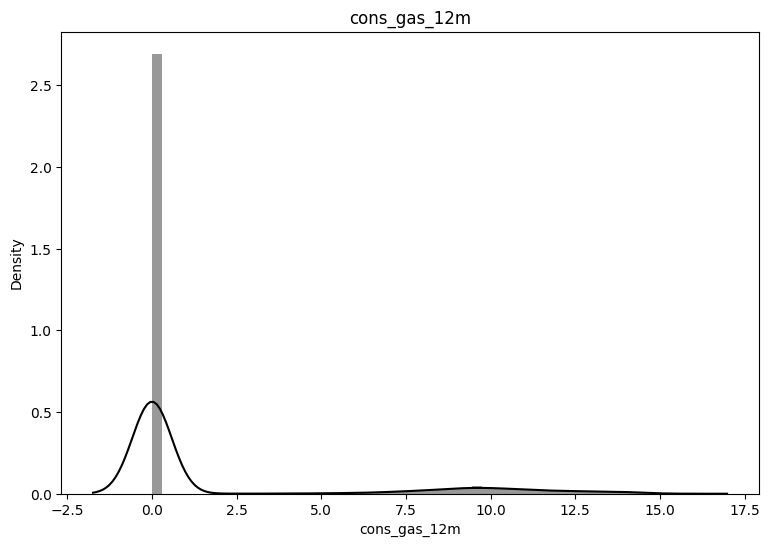

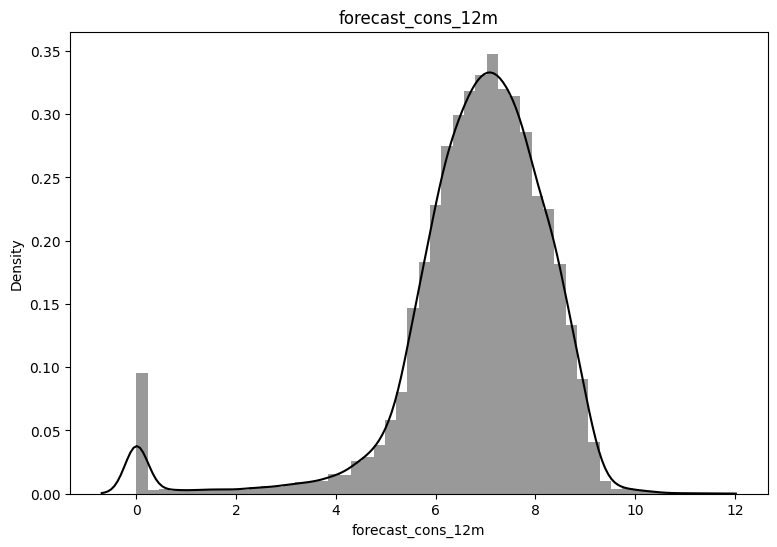

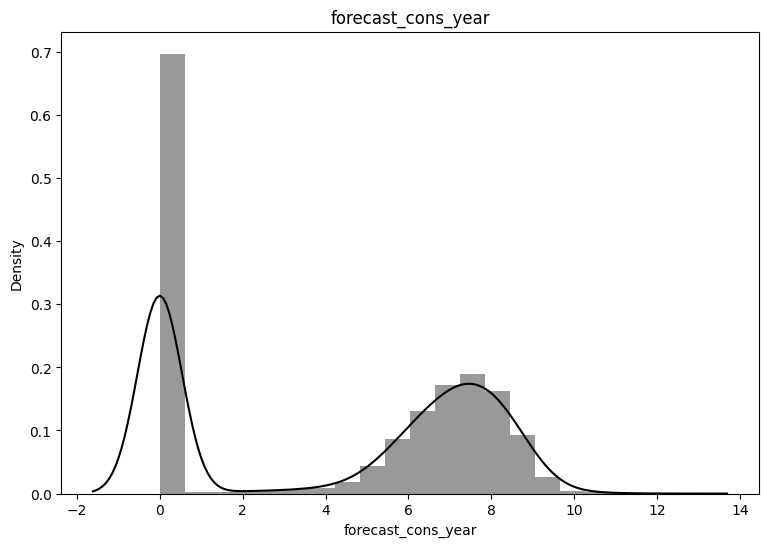

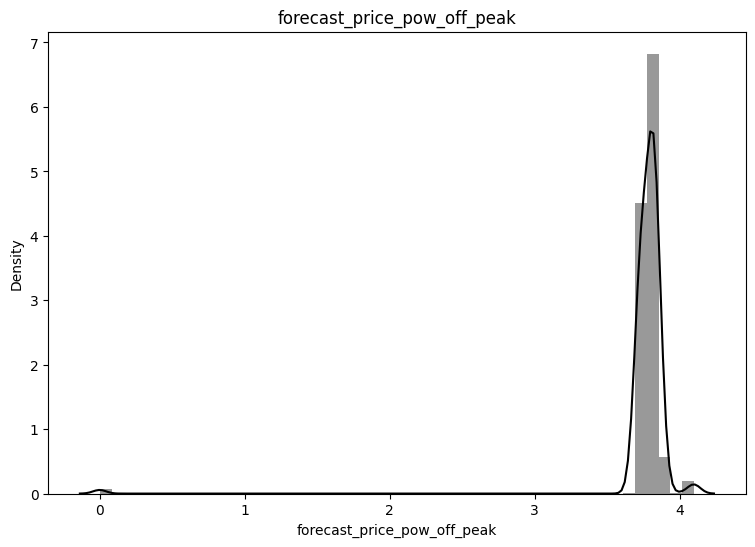

In [27]:
#Plots after transformations
for i in num_cols:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[i]
    sns.distplot(feature, ax = ax, color='black')
    ax.set_title(i)
plt.show()

Now we want our features to correlate linearly with in order to have appropriate predictions. But high correlation also implies they share the similar information. We will find the independent features having low correlations with others and then remove the highly correlated ones.

In [28]:
correlation=df.drop(columns=['id','price_date_y','price_date']).corr()

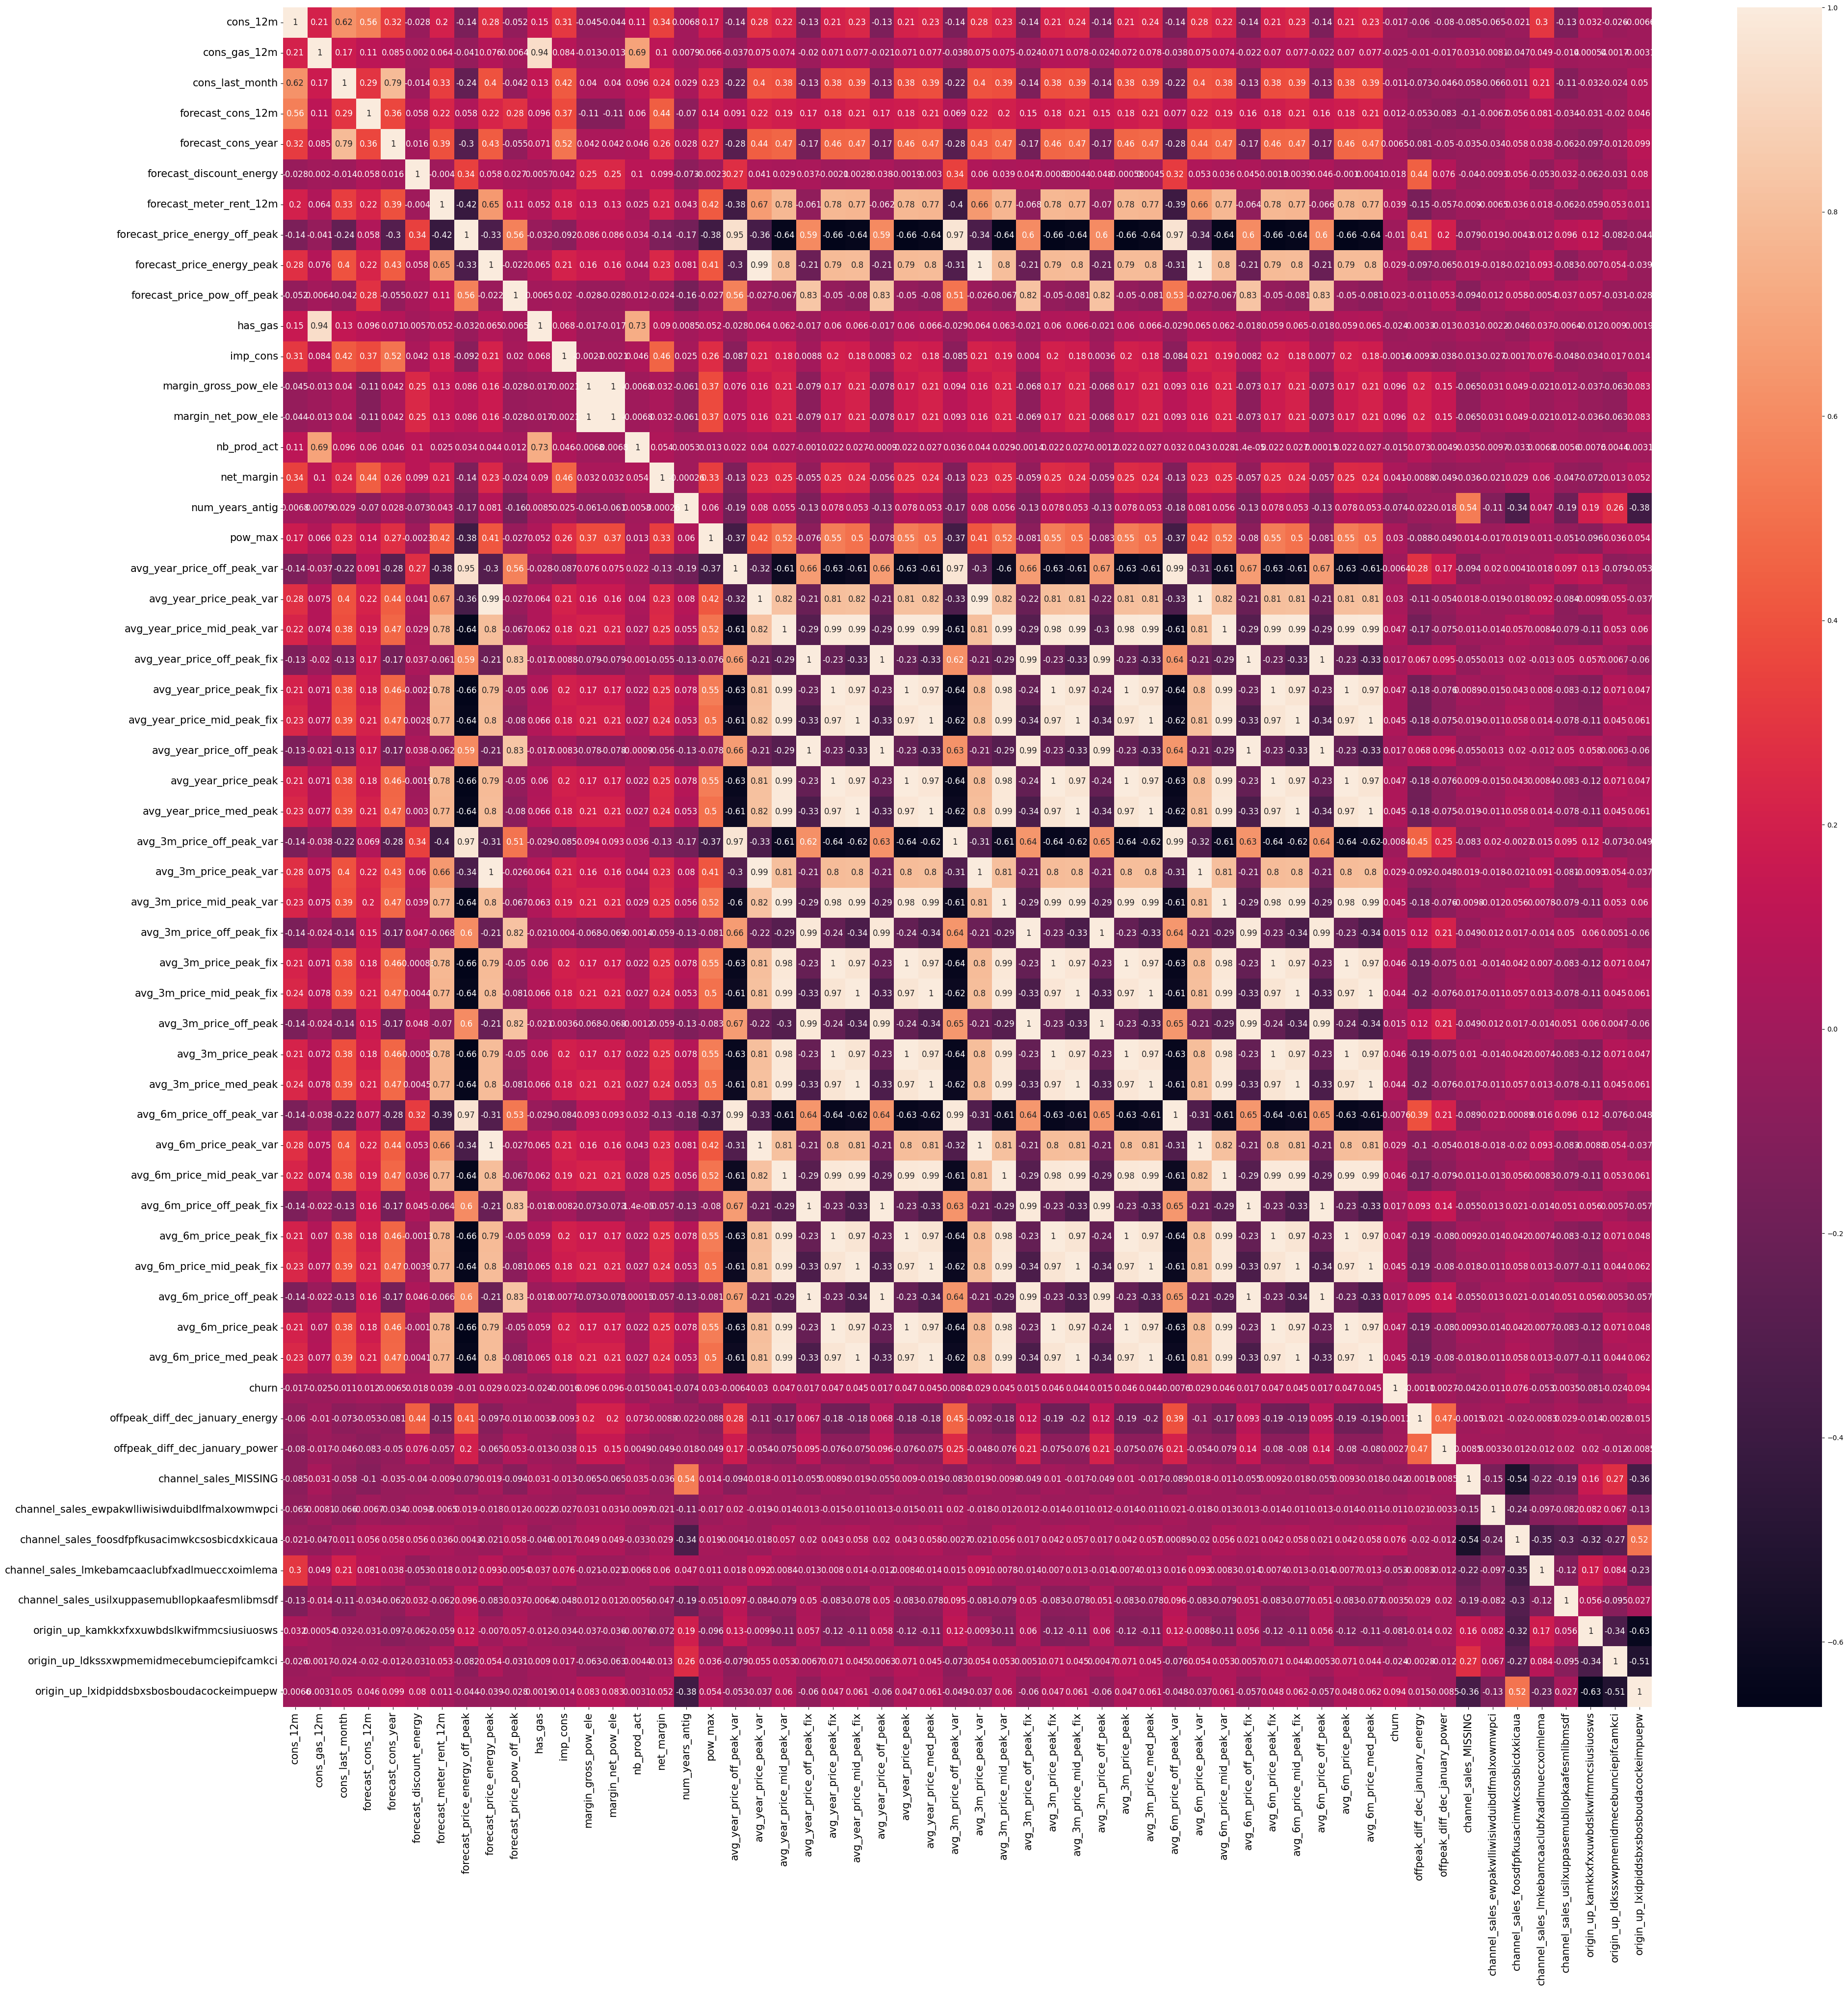

In [29]:
plt.figure(figsize=(45, 45))
sns.heatmap(
    correlation, 
    xticklabels=correlation.columns.values,
    yticklabels=correlation.columns.values, 
    annot=True, 
    annot_kws={'size': 12},
)
# Axis ticks size
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [30]:
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000     10.914124         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  8.446985      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.300786      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  7.368340      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  8.395252      0.000000         6.267201   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           5.252012            0.000000                       0.0   
2           3.891004            0.000000                       0.0   
3           5.484963            0.000000                       0.0   
4           6.101999            6.267201                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.022451                        0.108389   
1                 2.848971                        0.136025   
2                 3.681855                        0.153402   
3                 3.036394                        0.136883   
4                 4.888317                        0.110557   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.093620                     3.728261        1      0.00   
1                    0.000000                     3.813558        0      0.00   
2                    0.084248                     3.813558        0      0.00   
3                    0.000000                     3.813558        0      0.00   
4                    0.095324                     3.728261        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  avg_year_price_off_peak_var  \
0                3   43.648                     0.124787   
1                6   13.800                     0.149609   
2                6   13.856                     0.170512   
3                6   13.200                     0.151210   
4                6   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_mid_peak_var  \
0                 0.100749                     0.066530   
1                 0.007124                     0.000000   
2                 0.088421                     0.000000   
3                 0.000000                     0.000000   
4                 0.103638                     0.072865   

   avg_year_price_off_peak_fix  avg_year_price_peak_fix  \
0                    40.942265                22.352010   
1                    44.311375                 0.000000   
2                    44.385450                 0.000000   
3                    44.400265                 0.000000   
4                    40.688156                24.412893   

   avg_year_price_mid_peak_fix  avg_year_price_off_peak  avg_year_price_peak  \
0                    14.901340                41.067053            22.452760   
1                     0.000000                44.460984             0.007124   
2                     0.000000                44.555962             0.088421   
3                     0.000000                44.551475             0.000000   
4                    16.275263                40.812330            24.516531   

   avg_year_price_med_peak price_date_y  avg_3m_price_off_peak_var  \
0                14.967871   2015-11-16                   0.131756   
1                 0.000000   2015-11-16                   0.147600   
2                 0.000000   2015-11-16                   0.167798   
3     

In [31]:
#Removing variables with high corelation
df = df.drop(columns=['avg_year_price_mid_peak_var', 'avg_year_price_peak_fix', 'avg_year_price_mid_peak_fix', 'avg_year_price_peak', 'avg_year_price_med_peak', 'avg_6m_price_mid_peak_var', 'avg_6m_price_peak_fix', 'avg_6m_price_mid_peak_fix', 'avg_6m_price_peak','avg_6m_price_med_peak', 'avg_3m_price_mid_peak_var', 'avg_3m_price_off_peak_fix', 'avg_3m_price_peak_fix', 'avg_3m_price_mid_peak_fix', 'avg_3m_price_peak', 'avg_3m_price_med_peak','price_date_y','price_date'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month  \
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000     10.914124         0.000000   
1  d29c2c54acc38ff3c0614d0a653813dd  8.446985      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  6.300786      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  7.368340      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  8.395252      0.000000         6.267201   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy  \
0           0.000000            0.000000                       0.0   
1           5.252012            0.000000                       0.0   
2           3.891004            0.000000                       0.0   
3           5.484963            0.000000                       0.0   
4           6.101999            6.267201                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak  \
0                 1.022451                        0.108389   
1                 2.848971                        0.136025   
2                 3.681855                        0.153402   
3                 3.036394                        0.136883   
4                 4.888317                        0.110557   

   forecast_price_energy_peak  forecast_price_pow_off_peak  has_gas  imp_cons  \
0                    0.093620                     3.728261        1      0.00   
1                    0.000000                     3.813558        0      0.00   
2                    0.084248                     3.813558        0      0.00   
3                    0.000000                     3.813558        0      0.00   
4                    0.095324                     3.728261        0     52.32   

   margin_gross_pow_ele  margin_net_pow_ele  nb_prod_act  net_margin  \
0                 25.44               25.44            2      678.99   
1                 16.38               16.38            1       18.89   
2                 28.60               28.60            1        6.60   
3                 30.22               30.22            1       25.46   
4                 44.91               44.91            1       47.98   

   num_years_antig  pow_max  avg_year_price_off_peak_var  \
0                3   43.648                     0.124787   
1                6   13.800                     0.149609   
2                6   13.856                     0.170512   
3                6   13.200                     0.151210   
4                6   19.800                     0.124174   

   avg_year_price_peak_var  avg_year_price_off_peak_fix  \
0                 0.100749                    40.942265   
1                 0.007124                    44.311375   
2                 0.088421                    44.385450   
3                 0.000000                    44.400265   
4                 0.103638                    40.688156   

   avg_year_price_off_peak  avg_3m_price_off_peak_var  avg_3m_price_peak_var  \
0                41.067053                   0.131756               0.092638   
1                44.460984                   0.147600               0.000000   
2                44.555962                   0.167798               0.088409   
3                44.551475                   0.148586               0.000000   
4                40.812330                   0.119906               0.101673   

   avg_3m_price_off_peak  avg_6m_price_off_peak_var  avg_6m_price_peak_var  \
0              42.629663                   0.123598               0.098104   
1              44.592310                   0.147851               0.014247   
2              44.612508                   0.168569               0.088535   
3              44.593296                   0.149330               0.000000   
4              40.848791                   0.121266               0.102368   

   avg_6m_price_off_peak_fix  avg_6m_price_off_peak  churn  \
0                  41.318559              41.442157      1   
1                  44.355820              44.503

In [32]:
df.shape

(14605, 41)

## PREDICTION MODELS

In [33]:
X = df.drop(columns=['id', 'churn'])    #Independent Variable
y = df['churn']     #Dependent Variable

Splitting the dataset into train set and test set

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

In [35]:
print('Training set data points:', len(X_train), '\nTest set data points:', len(X_test))

Training set data points: 10953 
Test set data points: 3652


In [36]:
y.value_counts()

churn
0    13186
1     1419
Name: count, dtype: int64

Here the no. of customers not churned is very higher than the churn number so Oversampling must be used to overcome it.
Synthetic Minority Oversampling Technique(SMOTE) is implemented to do so.

In [37]:
from imblearn.over_sampling import SMOTE
X, y = SMOTE().fit_resample(X, y)

In [38]:
y.value_counts()

churn
1    13186
0    13186
Name: count, dtype: int64

### LOGISTIC REGRESSION

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression().fit(X_train, y_train)

In [40]:
y_pred1 = logreg.predict(X_test)

In [41]:
#Accuracy scores and confusion matrix
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score
print("Precision:",precision_score(y_test, y_pred1))
print("Recall:",recall_score(y_test, y_pred1))
print('Accuracy: ', accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))

Precision: 0.23076923076923078
Recall: 0.009375
Accuracy:  0.910460021905805
[[3322   10]
 [ 317    3]]


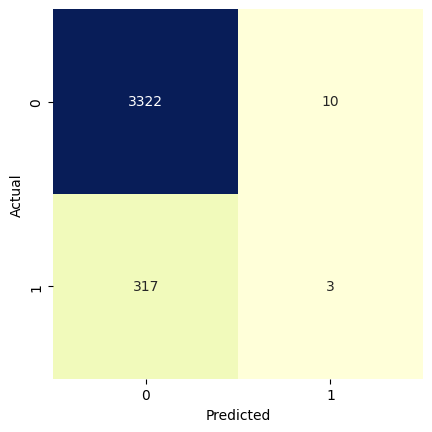

In [42]:
sns.heatmap(confusion_matrix(y_test, y_pred1), square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [43]:
from sklearn. metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3332
           1       0.23      0.01      0.02       320

    accuracy                           0.91      3652
   macro avg       0.57      0.50      0.49      3652
weighted avg       0.85      0.91      0.87      3652



In [44]:
#Predicting the probabilities
y_pred1_prob=logreg.predict_proba(X_test)

In [45]:
print(y_pred1_prob[:25])

[[0.87850049 0.12149951]
 [0.92917557 0.07082443]
 [0.96671123 0.03328877]
 [0.9233563  0.0766437 ]
 [0.79227065 0.20772935]
 [0.87240555 0.12759445]
 [0.90254811 0.09745189]
 [0.88526939 0.11473061]
 [0.90454147 0.09545853]
 [0.98397975 0.01602025]
 [0.86681934 0.13318066]
 [0.89064823 0.10935177]
 [0.93408106 0.06591894]
 [0.94695554 0.05304446]
 [0.92746198 0.07253802]
 [0.93177192 0.06822808]
 [0.89431638 0.10568362]
 [0.9245047  0.0754953 ]
 [0.84230415 0.15769585]
 [0.90134642 0.09865358]
 [0.93617333 0.06382667]
 [0.89272784 0.10727216]
 [0.89944128 0.10055872]
 [0.95386557 0.04613443]
 [0.84795903 0.15204097]]


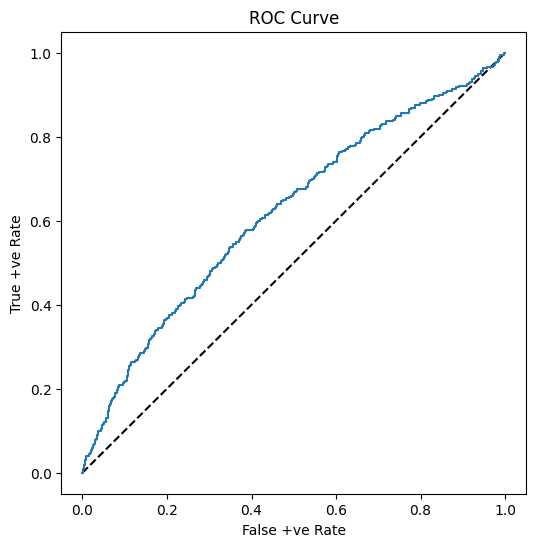

In [46]:
#Plotting the ROC Curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred1_prob[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.show()

In [47]:
#Area Under Curve(AUC) of ROC curve
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test,y_pred1_prob[:,1]))


0.618937575030012


3322 out of 3332 -ve cases (churn=0) are predicted correctly.

Only 3 out of 320 +ve cases (churn=1) are predicted correctly.

The accuracy(=0.91) for this model is high but is misleading as the precision(=0.23) and recall(=0.009) is very low and hence the model is not good for predicting whether the customer will churn or not.

### RANDOM FOREST

In [48]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators = 1000).fit(X_train, (y_train))
print (forest)

RandomForestClassifier(n_estimators=1000)


In [49]:
y_pred2=forest.predict(X_test)
y_pred2_prob=forest.predict_proba(X_test)

In [50]:
print("Precision:",precision_score(y_test, y_pred2))
print("Recall:",recall_score(y_test, y_pred2))
print('Accuracy: ', accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))

Precision: 0.7916666666666666
Recall: 0.059375
Accuracy:  0.916210295728368
[[3327    5]
 [ 301   19]]


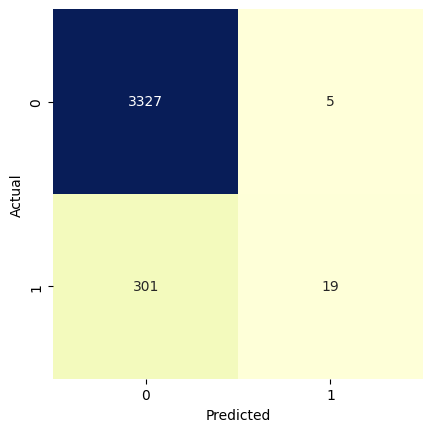

In [51]:
sns.heatmap(confusion_matrix(y_test, y_pred2), square=True, annot=True, cbar=False,  cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [52]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      3332
           1       0.23      0.01      0.02       320

    accuracy                           0.91      3652
   macro avg       0.57      0.50      0.49      3652
weighted avg       0.85      0.91      0.87      3652



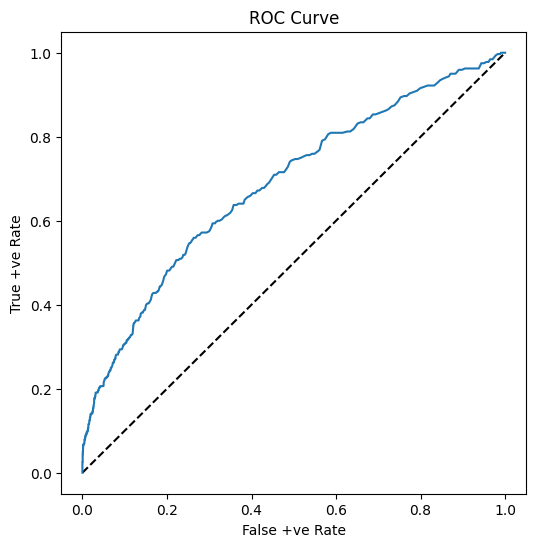

In [53]:
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_pred2_prob[:,1])
fig = plt.figure(figsize=(6, 6))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr2, tpr2)
plt.xlabel('False +ve Rate')
plt.ylabel('True +ve Rate')
plt.title('ROC Curve')
plt.show()

In [54]:
print(roc_auc_score(y_test,y_pred2_prob[:,1]))

0.685436674669868


3328 out of 3332 -ve cases (churn=0) are predicted correctly.

19 out of 320 +ve cases (churn=1) are predicted correctly. (much better than LOGISTIC REGRESSION model)

The accuracy(=0.917) for this model is a bit higher than previous model but precision(=0.79) and recall(=0.059) are much higher. The AUC(=0.68) is also higher portraying better model.
The only concern here is the low recall which despite being better than LOGISTIC REGRESSION model is still very poor.

The different features affect the predictions differently and their contribution/importance towards the prediction can be identified

In [55]:
importances=pd.DataFrame({'features':X_train.columns,'importance':forest.feature_importances_}).sort_values(by='importance',ascending=True).reset_index()

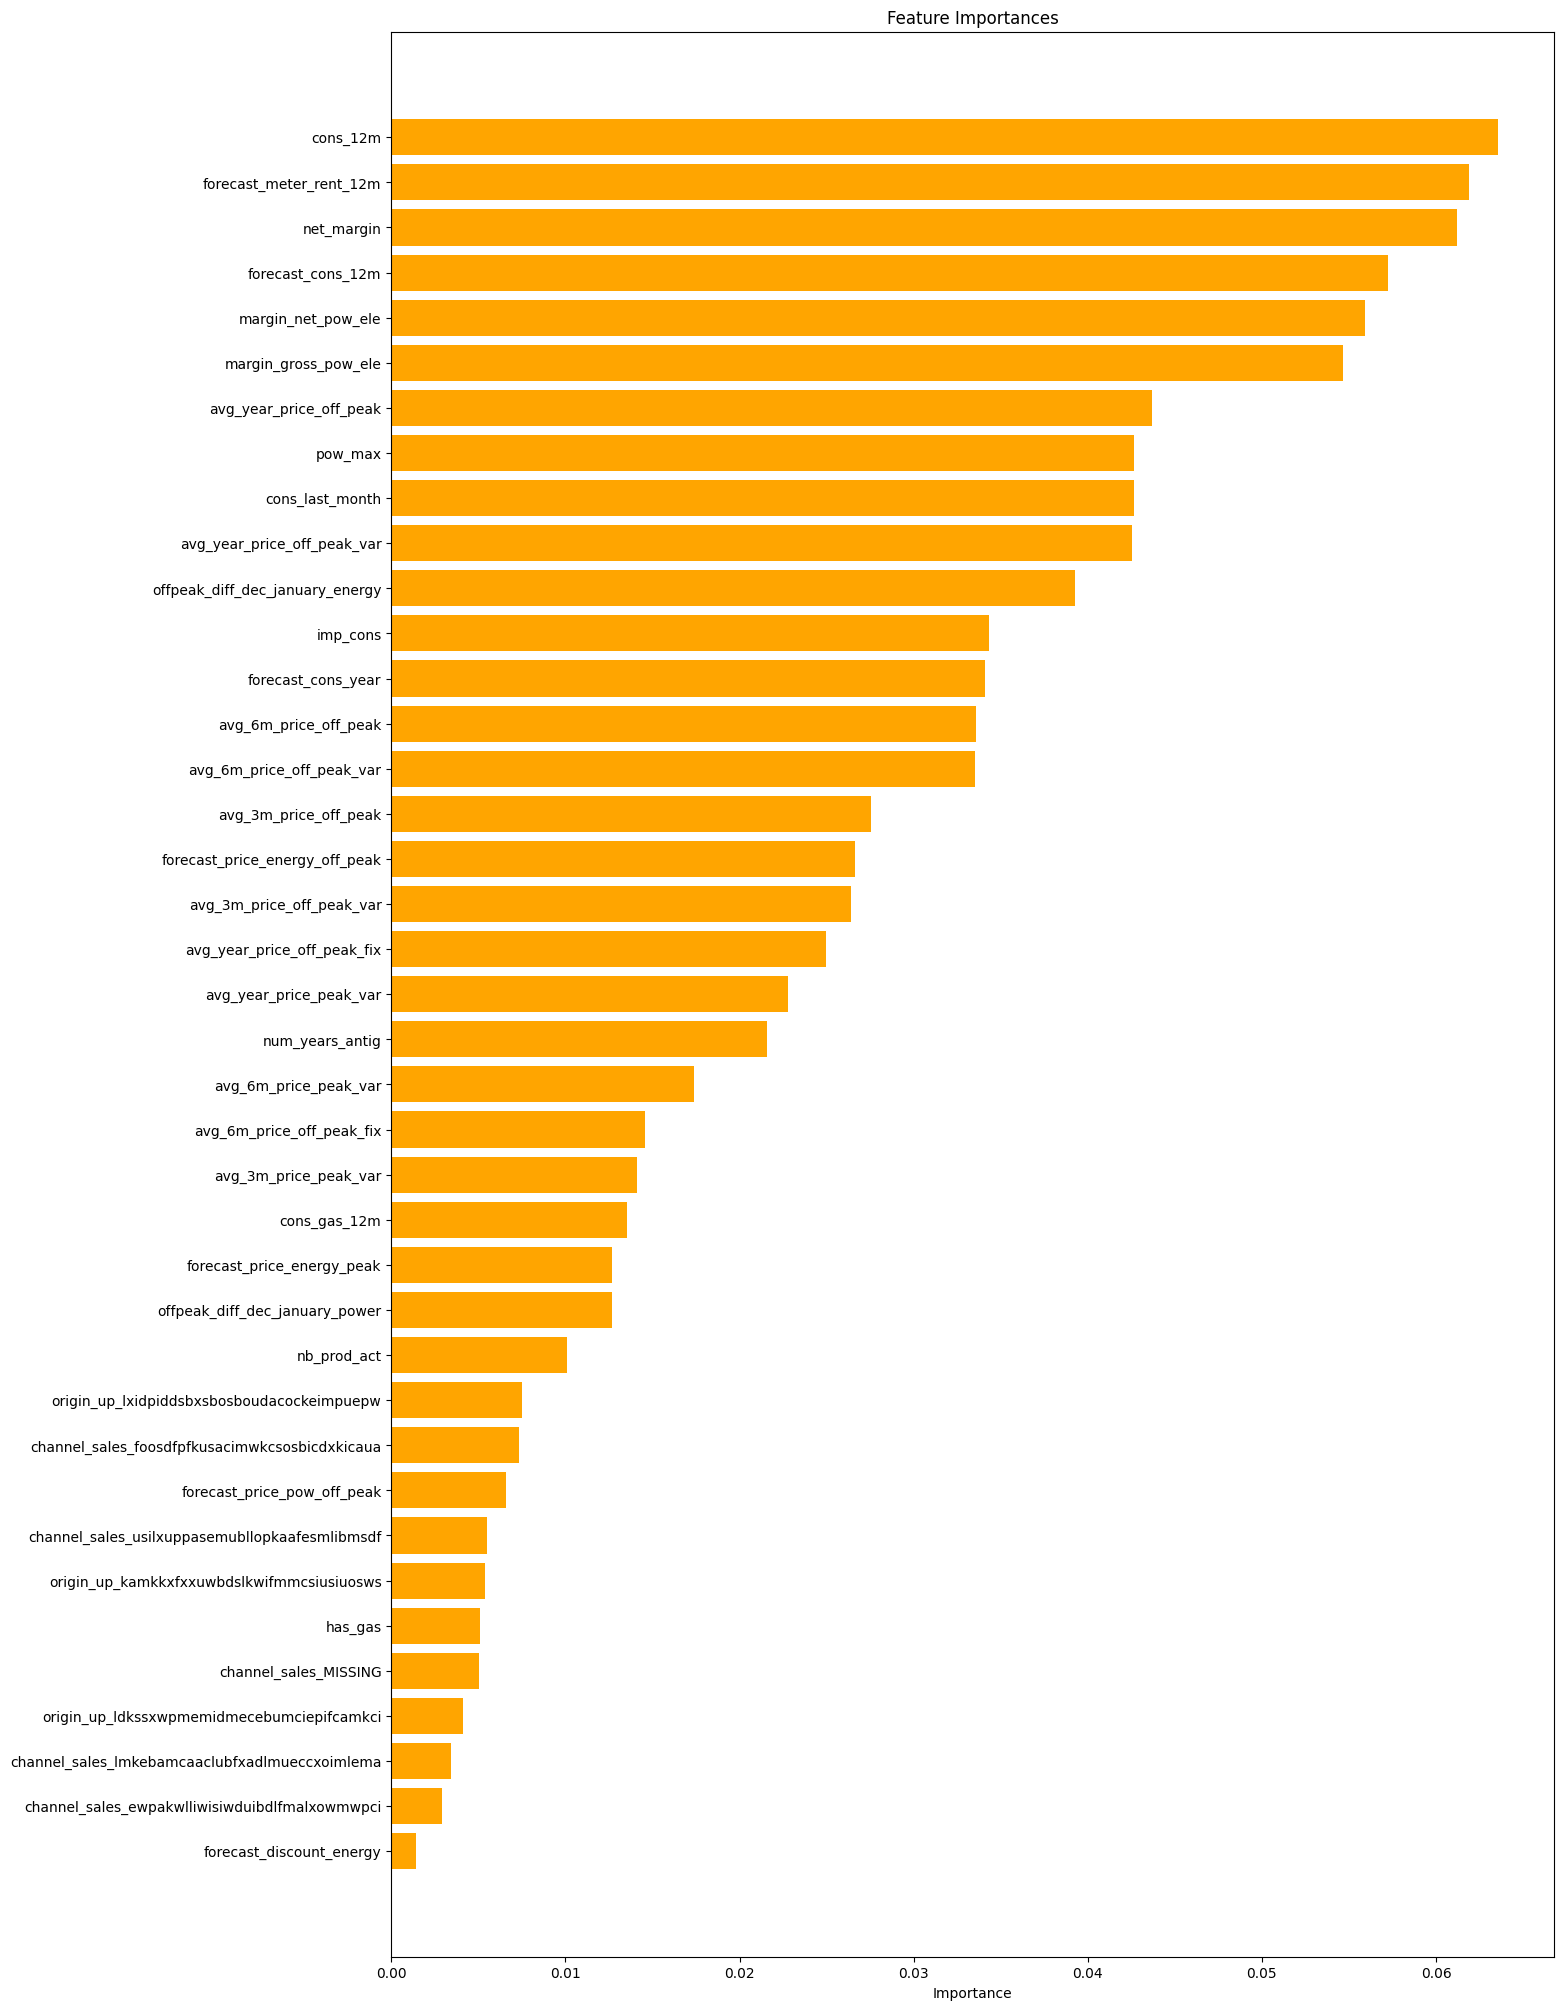

In [56]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(importances)), importances['importance'], color='orange', align='center')
plt.yticks(range(len(importances)), importances['features'])
plt.xlabel('Importance')
plt.show()

Consumption over 12 months and forecast meter rent 12 month are a top driver for churn in this model.

Net margin also plays an important role in the predictive model.

Our price sensitivity features are scattered around but are not the main driver for a customer churning.

In [57]:
X_test = X_test.reset_index()
X_test.drop(columns='index', inplace=True)

y_proba = forest.predict_proba(X_test)
probabilities = y_proba[:, 1]

X_test['churn'] = y_pred2.tolist()
X_test['churn_probability'] = probabilities.tolist()
X_test.to_csv('data_with_predictions.csv')

Saving the model

In [58]:
import joblib
filename = 'powerco_model.pkl'
joblib.dump(forest, filename)

['powerco_model.pkl']

# Business impact of discount

A 20% discount to the customers with high churn possibility was proposed by the client.

The revenue is to be forecasted for the set of customers when (i) No discount is offered (ii) 20% discount is offered to customers with more than a threshold probability of churning based on our model.

The threshold is also to be set/defined to increase revenues.

In [59]:
#Loading Data
bonus_df=pd.read_csv('./data_with_predictions.csv')

In [60]:
bonus_df.drop(columns='Unnamed: 0',inplace = True)

In [61]:
bonus_df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0   9.895304      8.303505         7.247793           7.622752   
1   8.777093      0.000000         6.100319           6.454978   
2  14.715504     13.206763        12.751332           7.345475   
3   8.813736      0.000000         0.000000           6.913220   
4  12.173369      0.000000         9.568854           5.610204   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            7.247793                       0.0                 4.888392   
1            6.100319                       0.0                 4.892902   
2            7.284135                       0.0                 4.888543   
3            0.000000                       0.0                 3.021887   
4            0.000000                       0.0                 4.873058   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.110055                    0.095308   
1                        0.109067                    0.095422   
2                        0.110566                    0.095830   
3                        0.135319                    0.000000   
4                        0.110207                    0.096579   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                     3.728261        1    140.90                 22.02   
1                     3.736217        0     42.13                 20.68   
2                     3.728261        1    144.16                 18.12   
3                     3.813558        0      0.00                 15.72   
4                     3.740171        0      0.00                 78.90   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               22.02            3      247.85                4   20.785   
1               20.68            1       74.50                6   15.500   
2               18.12            9      198.39                6   19.800   
3               15.72            1       99.06                6   13.200   
4               78.90            1       32.83                3   42.123   

   avg_year_price_off_peak_var  avg_year_price_peak_var  \
0                     0.123439                 0.102929   
1                     0.123686                 0.103489   
2                     0.125360                 0.104895   
3                     0.148698                 0.000000   
4                     0.126792                 0.106742   

   avg_year_price_off_peak_fix  avg_year_price_off_peak  \
0                    40.728885                40.852324   
1                    40.648679                40.772365   
2                    40.647427                40.772788   
3                    44.326190                44.474889   
4                    40.731700                40.858492   

   avg_3m_price_off_peak_var  avg_3m_price_peak_var  avg_3m_price_off_peak  \
0                   0.119336               0.101652              40.848221   
1                   0.118238               0.101781              41.180457   
2                   0.119916               0.102232              40.848801   
3                   0.146788               0.000000              44.591498   
4                   0.119514               0.103059              41.348399   

   avg_6m_price_off_peak_var  avg_6m_price_peak_var  \
0                   0.120696               0.102347   
1                   0.120001               0.101745   
2                   0.121276               0.102927   
3                   0.147185               0.000000   
4                   0.122553               0.104588   

   avg_6m_price_off_peak_fix  avg_6m_price_off_peak  \
0                  40.728885              40.849581   
1                  40.731388              40.851390   
2                  40.728885              40.850161   
3                  44.385450              44.532635   
4                  40.897429              41.019982   

   offpeak

In [62]:
bonus_df.shape

(3652, 41)

To determine the estimated electricity revenue for every customer over the next year, multiply their forecasted consumption with the projected price, naming this basecase_revenue.

For customers who churn, reduce this estimate by 91.9%, considering an average churn time between January and March 2016. Hence, the adjusted revenue is calculated as basecase_revenue_after_churn = basecase_revenue * (1 - 0.919 * churn).

In [63]:
bonus_df['basecase_revenue'] = (np.power(10, bonus_df['forecast_cons_12m']) + 1) * bonus_df['forecast_price_energy_off_peak'] + bonus_df['forecast_meter_rent_12m']
bonus_df['basecase_revenue_after_churn'] = bonus_df['basecase_revenue'] * (1 - 0.919 * bonus_df['churn'])

In [64]:
bonus_df.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m  \
0   9.895304      8.303505         7.247793           7.622752   
1   8.777093      0.000000         6.100319           6.454978   
2  14.715504     13.206763        12.751332           7.345475   
3   8.813736      0.000000         0.000000           6.913220   
4  12.173369      0.000000         9.568854           5.610204   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m  \
0            7.247793                       0.0                 4.888392   
1            6.100319                       0.0                 4.892902   
2            7.284135                       0.0                 4.888543   
3            0.000000                       0.0                 3.021887   
4            0.000000                       0.0                 4.873058   

   forecast_price_energy_off_peak  forecast_price_energy_peak  \
0                        0.110055                    0.095308   
1                        0.109067                    0.095422   
2                        0.110566                    0.095830   
3                        0.135319                    0.000000   
4                        0.110207                    0.096579   

   forecast_price_pow_off_peak  has_gas  imp_cons  margin_gross_pow_ele  \
0                     3.728261        1    140.90                 22.02   
1                     3.736217        0     42.13                 20.68   
2                     3.728261        1    144.16                 18.12   
3                     3.813558        0      0.00                 15.72   
4                     3.740171        0      0.00                 78.90   

   margin_net_pow_ele  nb_prod_act  net_margin  num_years_antig  pow_max  \
0               22.02            3      247.85                4   20.785   
1               20.68            1       74.50                6   15.500   
2               18.12            9      198.39                6   19.800   
3               15.72            1       99.06                6   13.200   
4               78.90            1       32.83                3   42.123   

   avg_year_price_off_peak_var  avg_year_price_peak_var  \
0                     0.123439                 0.102929   
1                     0.123686                 0.103489   
2                     0.125360                 0.104895   
3                     0.148698                 0.000000   
4                     0.126792                 0.106742   

   avg_year_price_off_peak_fix  avg_year_price_off_peak  \
0                    40.728885                40.852324   
1                    40.648679                40.772365   
2                    40.647427                40.772788   
3                    44.326190                44.474889   
4                    40.731700                40.858492   

   avg_3m_price_off_peak_var  avg_3m_price_peak_var  avg_3m_price_off_peak  \
0                   0.119336               0.101652              40.848221   
1                   0.118238               0.101781              41.180457   
2                   0.119916               0.102232              40.848801   
3                   0.146788               0.000000              44.591498   
4                   0.119514               0.103059              41.348399   

   avg_6m_price_off_peak_var  avg_6m_price_peak_var  \
0                   0.120696               0.102347   
1                   0.120001               0.101745   
2                   0.121276               0.102927   
3                   0.147185               0.000000   
4                   0.122553               0.104588   

   avg_6m_price_off_peak_fix  avg_6m_price_off_peak  \
0                  40.728885              40.849581   
1                  40.731388              40.851390   
2                  40.728885              40.850161   
3                  44.385450              44.532635   
4                  40.897429              41.019982   

   offpeak

Appoint a threshold probability, say 0.5, where:

Customers above this churn probability receive a discount.
Customers below don't.

In the intervention scenario:

Customers taking the discount are assumed to stay the entire year, yielding a revenue of 0.8 * basecase_revenue.
Those not getting the discount may churn based on actual observed data.

Plot the change in revenue against different threshold probabilities. Identify the threshold that maximizes revenue. Two factors influence this:

Revenue retention from correctly predicting churners (true positives).
Revenue loss from unnecessarily discounting non-churners (false positives).

The goal is to find the balance where the benefit from true positives outweighs the cost of false positives. Modify assumptions as necessary to refine this balance.

In [65]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    #Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given => customer stays for full year, independent of whether the prediction
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

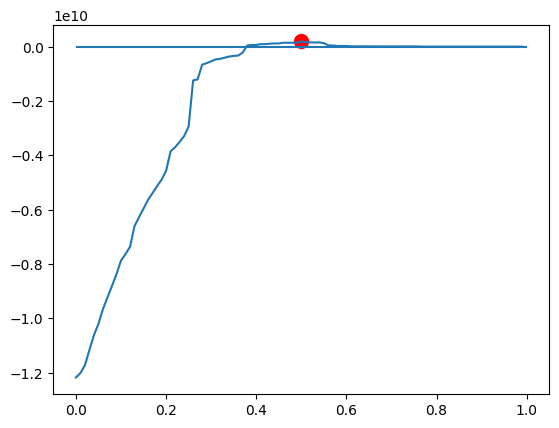

Maximum benefit at cutoff 0.5 with revenue delta of $189,966,473.71


In [66]:
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas = pd.Series({cutoff: get_rev_delta(bonus_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    # Plot the revenue deltas
    rev_deltas.plot()
    # Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='red')
    # Reference line for break-even
    plt.hlines(0, 0, 1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

Using a probability cut-off to decide who gets a discount might not be the best strategy.
We could be discounting unprofitable customers, thus negatively impacting our margins. It might be more cost-effective to let some high-churn, low-margin customers go.
Prioritizing solely based on churn probability can overlook the revenue potential. A customer with a high churn probability might also be high-value.
It's essential to weigh the cost of retention against customer value. Often, businesses mistakenly invest equal effort in retaining both low and high-value customers.
In essence, while managing churn, we should consider both the churn probability and the customer's value to the business.

In [67]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):

    #Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and rev
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()

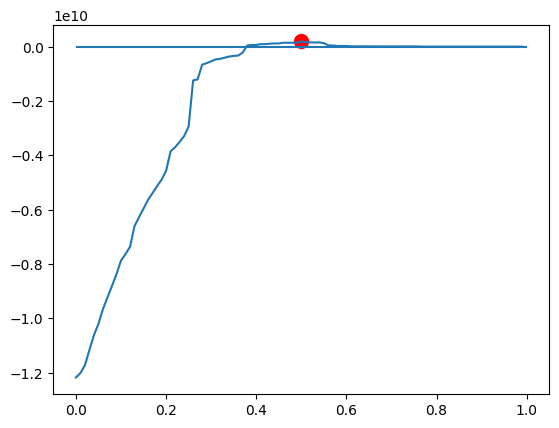

Maximum benefit at cutoff 0.5 with revenue delta of $189,966,473.71


In [68]:
## Generate a list of possible cutoffs and the corresponding overall revenue deltas
rev_deltas_high_value = pd.Series({cutoff: get_rev_delta_high_value(bonus_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas_high_value)

While our analysis used actual churn outcomes, ideal for retrospective "backtesting" of strategies, this approach has limitations:

Actual outcomes are useful for understanding past performance but might not be available for future predictions.
Relying solely on past data might lead to over-optimistic predictions if not validated on out-of-sample data.
Instead, we can optimize using predicted churn probabilities from our model. However, this introduces challenges:

If our model's probabilities aren't well-calibrated, it can lead to inaccuracies.
To ensure accurate results, we might need to calibrate model probabilities using methods like Platt scaling, sigmoid calibration, or isotonic regression

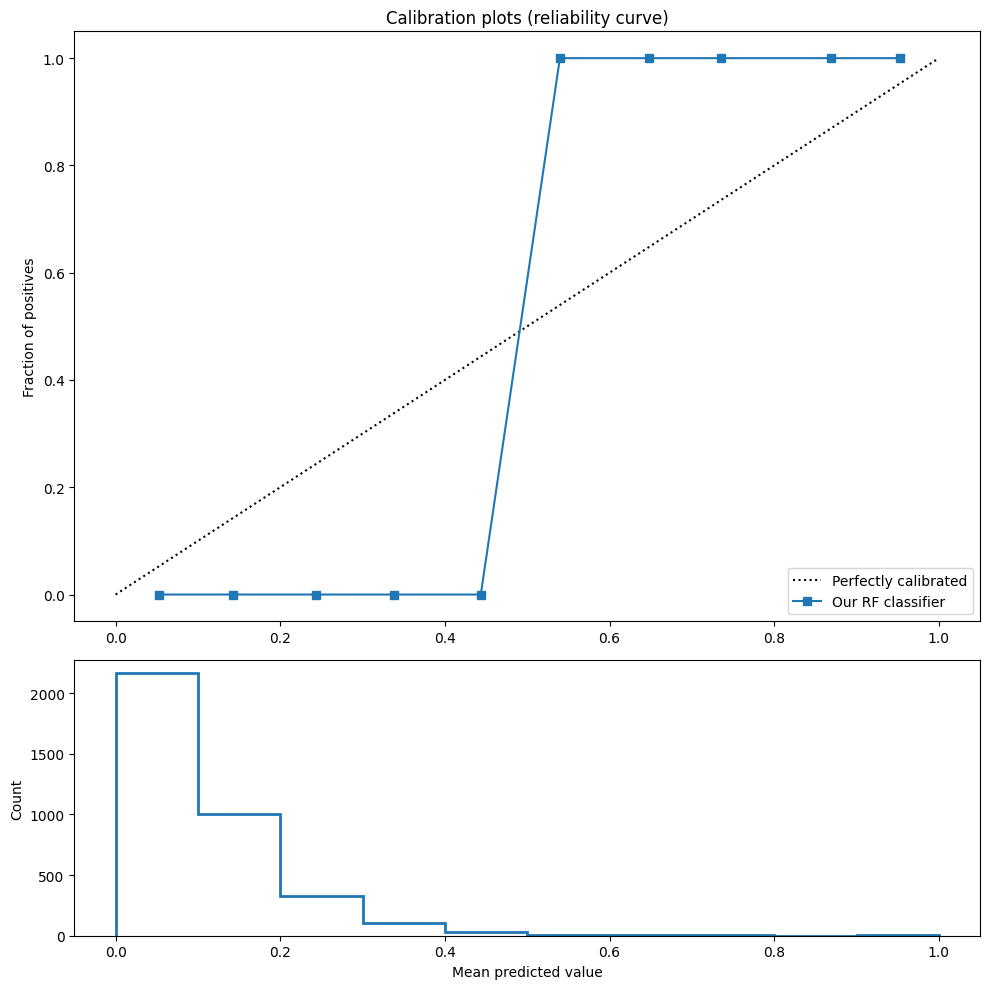

In [69]:
from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=bonus_df['churn'],
    y_prob=bonus_df['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(bonus_df['churn_probability'], range=(0, 1), bins=10, histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

The top calibration curve exhibits a sigmoid curve, which is typical for an under-confident classifier.
The bottom chart shows us that the model is postively skewed toward predicting a probability, perhaps due to having such low confidence.

In [70]:
bonus_df['basecase_revenue'] = np.power(10, bonus_df['forecast_cons_12m']) * bonus_df['forecast_price_energy_off_peak'] + bonus_df['forecast_meter_rent_12m']
bonus_df['basecase_revenue_after_churn'] = bonus_df['basecase_revenue'] * (1 - 0.919 * bonus_df['churn_probability'])

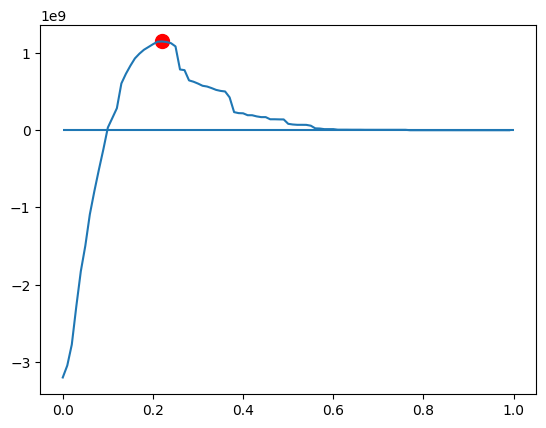

Maximum benefit at cutoff 0.22 with revenue delta of $1,150,561,412.85


In [71]:
rev_deltas = pd.Series({cutoff: get_rev_delta(bonus_df, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)